In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# READ IN DATA
df_long = pd.read_csv("data_Q2.csv", header=None)
df_long.columns= ['officer_id', 'unit', 'year', 'hours_worked_by_oid_in_yr', 'total_num_shifts','case_counts',
             'race', 'gender', 'birth_year','allegation_count', 'trr_count']
print(df_long.shape)
df_long.head()

(86557, 11)


,officer_id,unit,year,hours_worked_by_oid_in_yr,total_num_shifts,case_counts,race,gender,birth_year,allegation_count,trr_count
0,1,NaN,2014.0,3285.0,365,0,White,M,1971,6.0,7.0
1,1,NaN,2014.0,9.0,1,0,White,M,1971,6.0,7.0
2,1,NaN,2015.0,3285.0,365,0,White,M,1971,6.0,7.0
3,1,NaN,2016.0,891.0,101,0,White,M,1971,6.0,7.0
4,1,NaN,2016.0,1395.0,155,0,White,M,1971,6.0,7.0


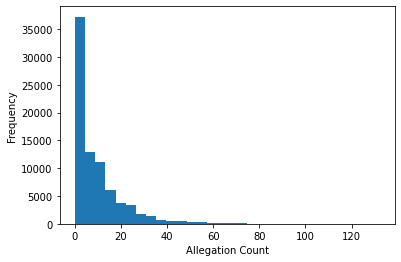

In [4]:
# EXPLORE THE DISTRIBUTION OF ALLEGATION COUNTS
df_long.groupby('allegation_count').count()
plt.hist(df_long['allegation_count'], bins=30)
plt.xlabel('Allegation Count')
plt.ylabel('Frequency');

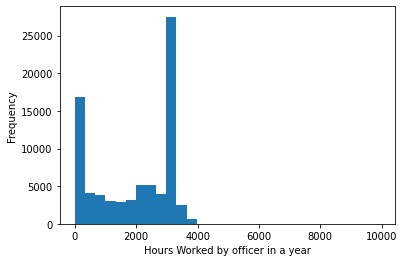

In [6]:
# EXPLORE THE DISTRIBUTION OF ALLEGATION COUNTS
df_long.groupby('hours_worked_by_oid_in_yr').count()
plt.hist(df_long['hours_worked_by_oid_in_yr'], bins=30)
plt.xlabel('Hours Worked by officer in a year')
plt.ylabel('Frequency');

In [4]:
# CREATE A COLUMN TO SHOW OFFICERS WITH AT LEAST ONE ALLEGATION COUNT
df_long['at least one alleg'] = df_long['allegation_count'] > 1
df_long

,officer_id,unit,year,hours_worked_by_oid_in_yr,total_num_shifts,case_counts,race,gender,birth_year,allegation_count,trr_count,at least one alleg
0,1,NaN,2014.0,3285.0,365,0,White,M,1971,6.0,7.0,True
1,1,NaN,2014.0,9.0,1,0,White,M,1971,6.0,7.0,True
2,1,NaN,2015.0,3285.0,365,0,White,M,1971,6.0,7.0,True
3,1,NaN,2016.0,891.0,101,0,White,M,1971,6.0,7.0,True
4,1,NaN,2016.0,1395.0,155,0,White,M,1971,6.0,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
86552,35547,NaN,2020.0,1206.5,165,0,White,M,1996,NaN,NaN,False
86553,35548,NaN,2020.0,788.0,120,0,Hispanic,M,1992,NaN,NaN,False
86554,35550,NaN,2020.0,779.0,117,0,Black,F,1983,NaN,NaN,False
86555,35551,NaN,2020.0,1225.0,154,0,White,M,1997,NaN,NaN,False


In [24]:
# THERE WERE MULTIPLE ROWS FOR THE SAME OFFICER (ACROSS DIFFERENT YEARS)
# AGGREGATE THIS SO THAT EACH ROW REPRESENTS A UNIQUE OFFICER
df_clean = df_long.groupby('officer_id').mean().drop(columns=['year', 'unit', 'case_counts'], axis=1).dropna()
df_clean.head()

,hours_worked_by_oid_in_yr,total_num_shifts,birth_year,allegation_count,trr_count,at least one alleg
officer_id,,,,,,
1,1697.884615,178.785714,1971.0,6.0,7.0,1.0
2,2640.629167,300.750000,1980.0,8.0,4.0,1.0
7,3155.142857,351.285714,1972.0,8.0,5.0,1.0
15,2147.000000,238.500000,1983.0,1.0,9.0,0.0
16,1328.100000,138.090909,1984.0,19.0,24.0,1.0


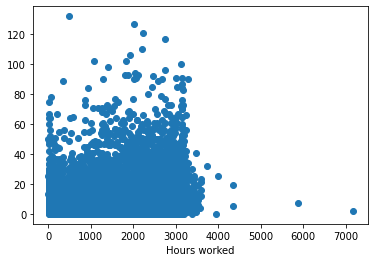

In [25]:
# WE ARE CURIOUS ABOUT THE RELATIONSHIP BETWEEN THESE VARIABLES, SO WE PLOTTED THEM
plt.scatter(df_clean['hours_worked_by_oid_in_yr'],df_clean['allegation_count'])
plt.xlabel("Hours worked");

Machine Learning model:


In [26]:
# FINDING THE DISTRIBUTION OF OUR Y VALUES
df_clean.groupby(['at least one alleg']).count().iloc[:,0]/len(df_clean)

at least one alleg
0.0    0.272578
1.0    0.727422
Name: hours_worked_by_oid_in_yr, dtype: float64

In [34]:
# SPLIT THE DATA INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X1 = df_clean[['hours_worked_by_oid_in_yr']]
y1 = df_clean['at least one alleg']
X_train1, X_test1, y_train1, y_test1=train_test_split(X1, y1, test_size=0.2, stratify=y1)


In [35]:
X_train1=np.array(X_train1)
y_train1=np.array(y_train1)
X_test1=np.array(X_test1)
y_test1=np.array(y_test1)

In [36]:
# Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Metrics for Decision Trees
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
# Initialize Model with hyperparameters
dt =  DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=3, min_samples_leaf=5)  

# Fit data to model
fitted_model = dt.fit(X_train1, y_train1)


In [38]:
# Evaluate fitted model
print("Model Score on Training Data:",fitted_model.score(X_train1, y_train1))
print("Model Score on Testing Data:",fitted_model.score(X_test1, y_test1))


Model Score on Training Data: 0.7424756034925526
Model Score on Testing Data: 0.7502054231717338


In [39]:
y_pred1 = fitted_model.predict(X_test1)

# Let's examine confusion matrix results 
# Evaluating our prediciton results 
a=accuracy_score(y_test1, y_pred1)
p=precision_score(y_test1, y_pred1)
r=recall_score(y_test1, y_pred1)
f1=f1_score(y_test1, y_pred1)


print("accuracy : %f:" %(a))
print("precision : %f:" %(p))
print("recall : %f:" %(r))
print("f1 score : %f" %(f1))


accuracy : 0.750205:
precision : 0.868738:
recall : 0.773574:
f1 score : 0.818399


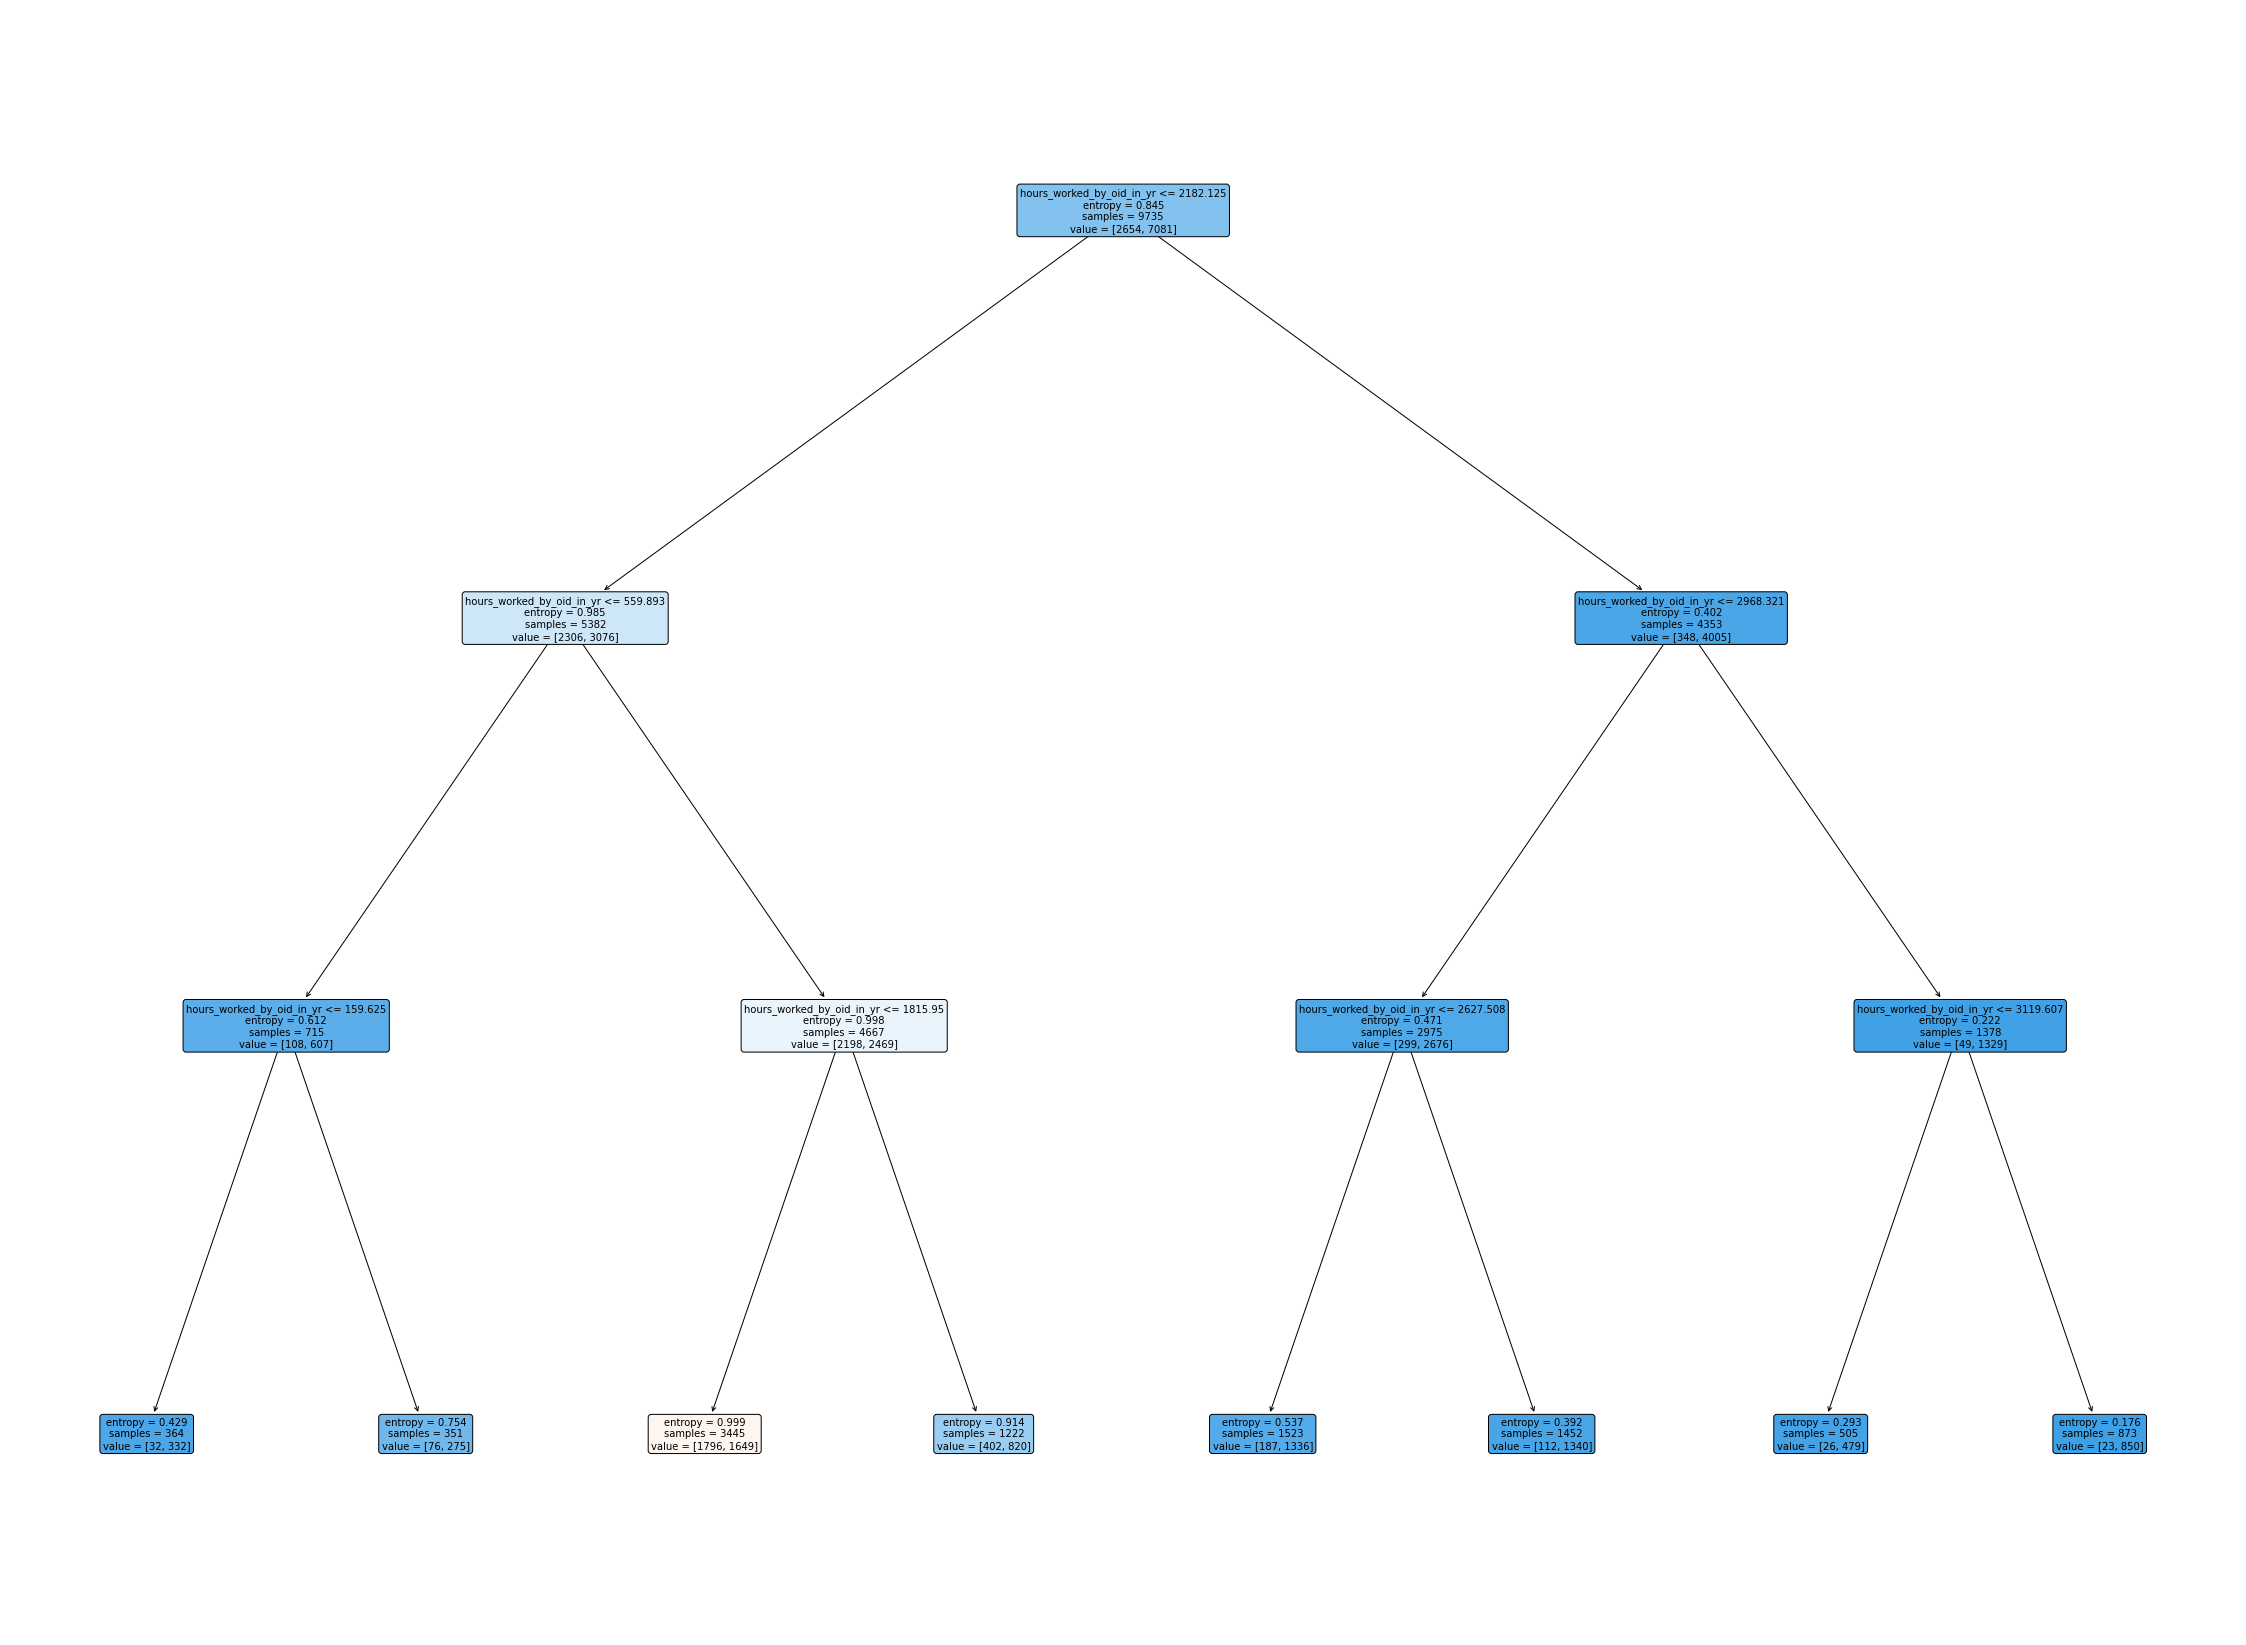

In [40]:
# IMPORT PACKAGES
from sklearn.tree import plot_tree
from sklearn import tree

# PLOT DECISIONS TREE
plt.figure (figsize=(40,30))
tree.plot_tree(fitted_model, fontsize=10, rounded=True, filled=True, feature_names = X1.columns);

In [41]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Metrics for Random Forests
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

# Cross Validation
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Specify the hyperparameter range 

# number of trees 
n_estimator = [int(x) for x in np.linspace(start =200, stop=1000,num=10)]
# number of feature at each split
max_features = ['auto','sqrt']
# max depth 
max_depth = [int(x) for x in np.linspace(start =1, stop=10,num=1)]
# min number of sample at each split 
min_sam_split = [2,5,10]


# Create a random grid 
rnd_grid= {'n_estimators':n_estimator,
          'max_features':max_features,
          'max_depth' :max_depth,
          'min_samples_split' :min_sam_split}

# use random search to select best hyperparameters 
# cv (Cross Validation) specifies number of times (3 fold in this case) that
# each hyper parameter combination will be evaluated)

rfn=RandomForestClassifier()

rfn_random = RandomizedSearchCV(estimator=rfn,param_distributions =rnd_grid,
                               n_iter = 10,cv=3,verbose=2,random_state=33,n_jobs=-1)

rfn_random.fit(X_train1, y_train1)

print('Best hyper parameter:', rfn_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyper parameter: {'n_estimators': 733, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 1}


In [43]:
print('Best hyper parameter:', rfn_random.best_params_)
best_random = rfn_random.best_estimator_
best_fit = best_random.fit(X_train1,y_train1)
y_pred_rnd = best_random.predict(X_test1)
rnd_accuracy = accuracy_score(np.array(y_test1), y_pred_rnd)

print('Random best hyperparameter accuracy: ', rnd_accuracy)

Best hyper parameter: {'n_estimators': 733, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 1}
Random best hyperparameter accuracy:  0.727608874281019


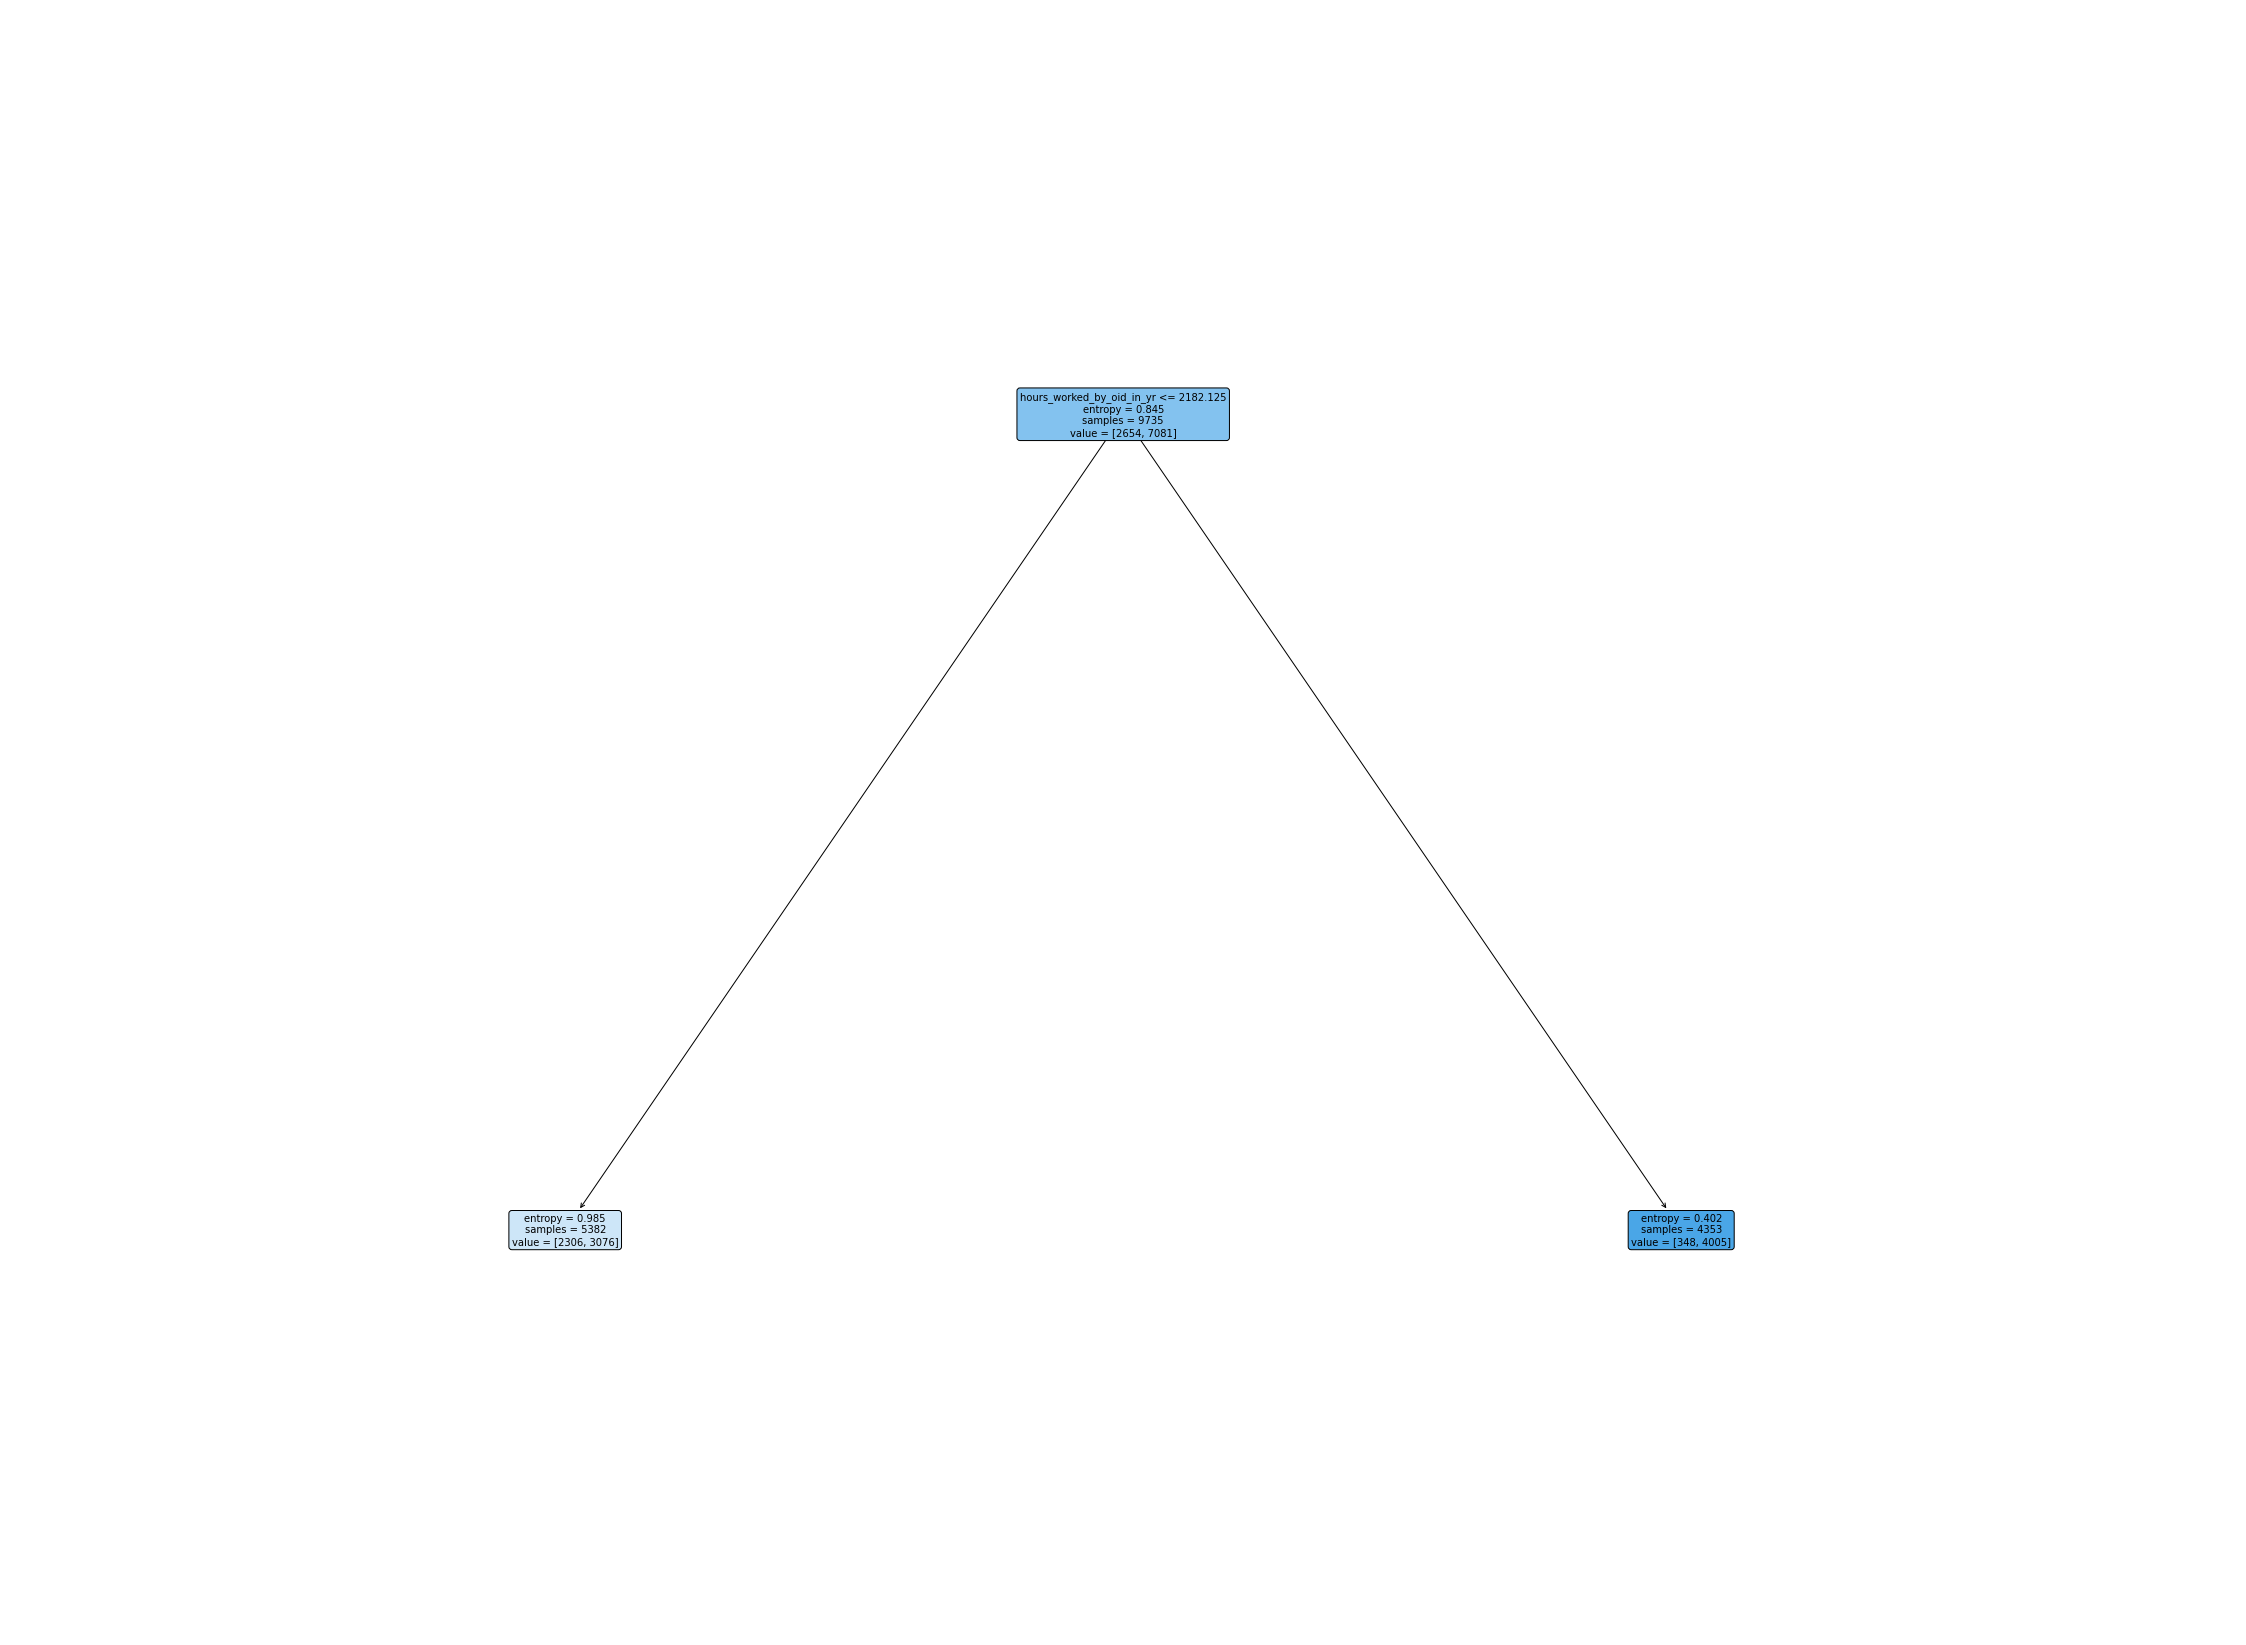

In [44]:
# Initialize Model with hyperparameters
dt2 =  DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=1, min_samples_leaf=10)  

# Fit data to model
fitted_model_2 = dt2.fit(X_train1, y_train1)

plt.figure (figsize=(40,30))
tree.plot_tree(fitted_model_2, fontsize=10, rounded=True, filled=True, feature_names = X1.columns);